In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
!pip install geojson

In [4]:
import geojson
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
with open('/content/drive/MyDrive/salinas_roads.geojson') as f:
  salinas_roads = geojson.load(f)
f.close()

In [5]:
crs = 'EPSG:4326'
salinas_roads

{"features": [{"geometry": {"coordinates": [[-121.764174, 36.88234], [-121.764161, 36.882553]], "type": "LineString"}, "id": "00440000000000003c31", "properties": {"fullname": "", "linearid": "110411267964", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.762506, 36.870252], [-121.761925, 36.870253], [-121.761708, 36.869757], [-121.761461, 36.869454]], "type": "LineString"}, "id": "00440000000000003c37", "properties": {"fullname": "", "linearid": "110411267948", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.771069, 36.858457], [-121.776321, 36.858616]], "type": "LineString"}, "id": "00440000000000003c57", "properties": {"fullname": "", "linearid": "110411263059", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.779995, 36.874658], [-121.779862, 36.875054]], "type": "LineString"}, "id": "00440000000000003c6b", "properties": {"fullname": "", "linearid": "110411268635",

In [6]:
salinas_roads

{"features": [{"geometry": {"coordinates": [[-121.764174, 36.88234], [-121.764161, 36.882553]], "type": "LineString"}, "id": "00440000000000003c31", "properties": {"fullname": "", "linearid": "110411267964", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.762506, 36.870252], [-121.761925, 36.870253], [-121.761708, 36.869757], [-121.761461, 36.869454]], "type": "LineString"}, "id": "00440000000000003c37", "properties": {"fullname": "", "linearid": "110411267948", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.771069, 36.858457], [-121.776321, 36.858616]], "type": "LineString"}, "id": "00440000000000003c57", "properties": {"fullname": "", "linearid": "110411263059", "mtfcc": "S1400", "rttyp": ""}, "type": "Feature"}, {"geometry": {"coordinates": [[-121.779995, 36.874658], [-121.779862, 36.875054]], "type": "LineString"}, "id": "00440000000000003c6b", "properties": {"fullname": "", "linearid": "110411268635",

In [7]:
len(salinas_roads['features'])

48

In [17]:
bounding_x = [-121.80485296744186, -121.76176596182663]
bounding_y = [36.839809357276856, 36.88472045737066]

# Assuming 'step' is defined as the desired step size.
step = 0.05

# Initialize lists to collect points and their perpendicular angles.
x = []
y = []
perpendicular_angles = []

for line in salinas_roads['features']:
    for index in range(1, len(line['geometry']['coordinates'])):
        x_0, y_0 = line['geometry']['coordinates'][index - 1]
        x_1, y_1 = line['geometry']['coordinates'][index]

        if (x_0 < bounding_x[0] or x_0 > bounding_x[1] or y_0 < bounding_y[0] or y_0 > bounding_y[1]):
          continue

        dx = x_1 - x_0
        dy = y_1 - y_0
        magnitude = np.sqrt(dx ** 2 + dy ** 2)

        # Normalize the step vector
        if magnitude != 0:
            dx_norm = dx / magnitude
            dy_norm = dy / magnitude

        # Calculate the angle of the line to the x-axis
        theta = math.atan2(dy, dx)  # atan2 handles dx=0 automatically

        # Convert theta to a bearing (angle from north)
        bearing = (math.degrees(theta)) % 360 + 90

        while magnitude > 0:
            print(x_0, y_0, bearing)
            x.append(x_0)
            y.append(y_0)
            perpendicular_angles.append(bearing)
            x_0 += dx_norm * step
            y_0 += dy_norm * step
            magnitude -= step

-121.764174 36.88234 176.5074068403598
-121.762506 36.870252 90.09861570187718
-121.761925 36.870253 383.62937773134576
-121.771069 36.858457 268.26594682426713
-121.779995 36.874658 161.4349322945461
-121.797695 36.862211 322.30974671400696
-121.798011 36.861802 307.1119697392436
-121.798615 36.861345 299.99990533771364
-121.798977 36.861136 329.5491287469079
-121.799278 36.860624 300.4034244751781
-121.79952 36.860482 202.96590040429976
-121.799684 36.860869 202.08925323126135
-121.799962 36.861554 206.48457963090024
-121.800104 36.861839 200.6967662154448
-121.800424 36.862686 203.8079741194544
-121.802263 36.866854 214.87532834606154
-121.802378 36.867019 181.92154026260454
-121.802409 36.867943 152.59567206986657
-121.801875 36.868973 131.06414419140293
-121.800974 36.869758 129.86158512077756
-121.797556 36.872612 138.2509755049806
-121.795663 36.874733 162.53012616968027
-121.795601 36.87493 162.54079736389093
-121.797497 36.883005 246.3706222661397
-121.797577 36.88304 245.6589

In [11]:
import matplotlib.pyplot as plt

In [18]:
len(x), len(y)

(408, 408)

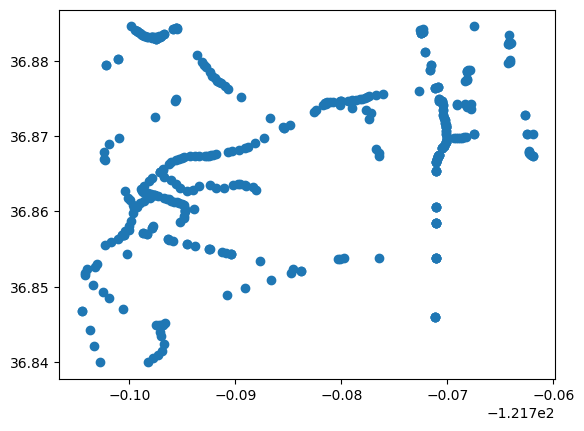

In [19]:
plt.scatter(x, y)

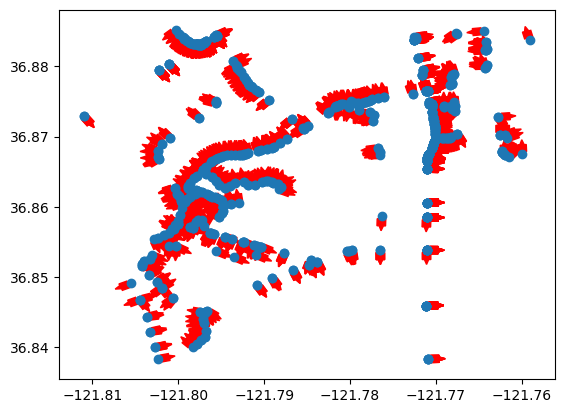

In [14]:
arrow_length = 0.001
for i in range(len(x)):
    # Calculate the arrow's dx and dy components based on the perpendicular angle
    dx = arrow_length * np.cos(np.radians(perpendicular_angles[i]))
    dy = arrow_length * np.sin(np.radians(perpendicular_angles[i]))

    # Plot each arrow
    plt.arrow(x[i], y[i], dx, dy, head_width=0.0005, head_length=0.0007, overhang=0, fc='red', ec='red', head_starts_at_zero = True)

# Plot the points
plt.scatter(x, y)